<a href="https://colab.research.google.com/github/Tufail-188/GeekForGeeks/blob/main/CustomerChurnPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
df = df.dropna()


In [6]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])


In [7]:
X = df.drop("Churn", axis=1)   # features
y = df["Churn"]                # target


In [8]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [10]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [12]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [13]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*50)

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.8207729468599034
Precision: 0.7973684210526316
Recall: 0.8665395614871306
F1 Score: 0.8305162174508908
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1021
           1       0.80      0.87      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

--- Decision Tree ---
Accuracy: 0.8019323671497585
Precision: 0.8092933204259438
Recall: 0.7969494756911344
F1 Score: 0.803073967339097
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1021
           1       0.81      0.80      0.80      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

--- Random Forest ---
Accuracy: 0.8560386473429952
Precision: 0.855

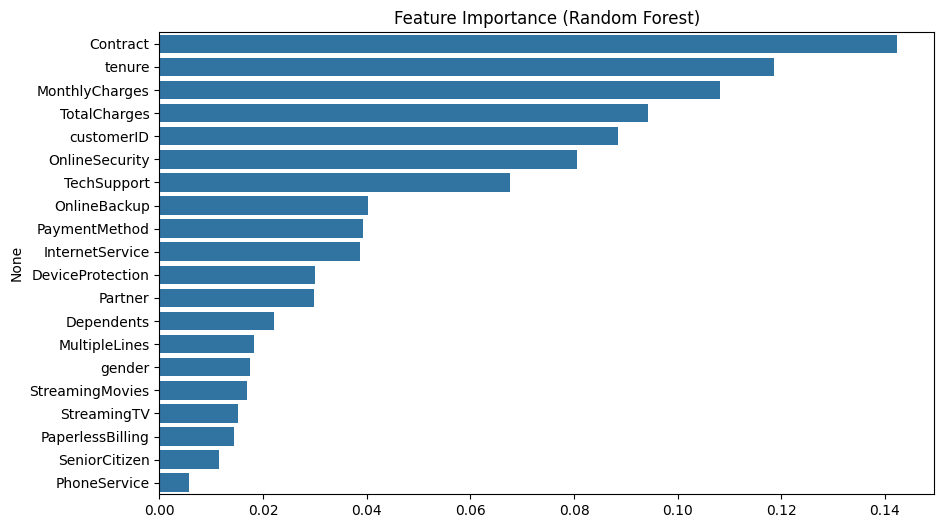

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()


/tmp/ipython-input-2489010937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


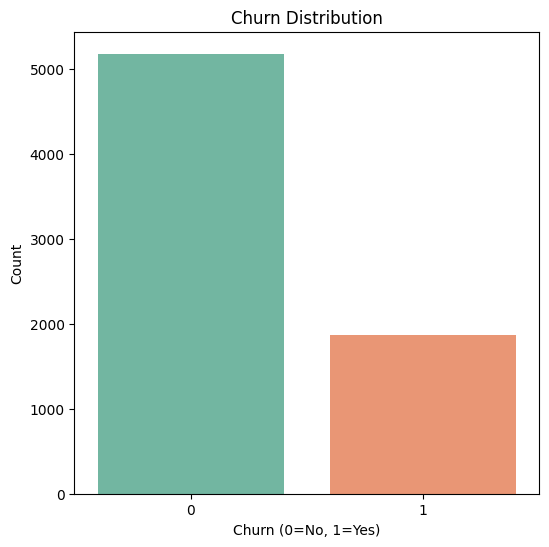

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x=y, palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


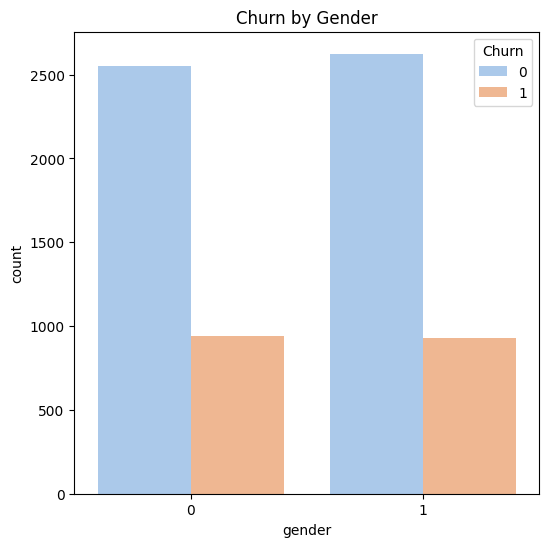

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x="gender", hue="Churn", data=df, palette="pastel")
plt.title("Churn by Gender")
plt.show()


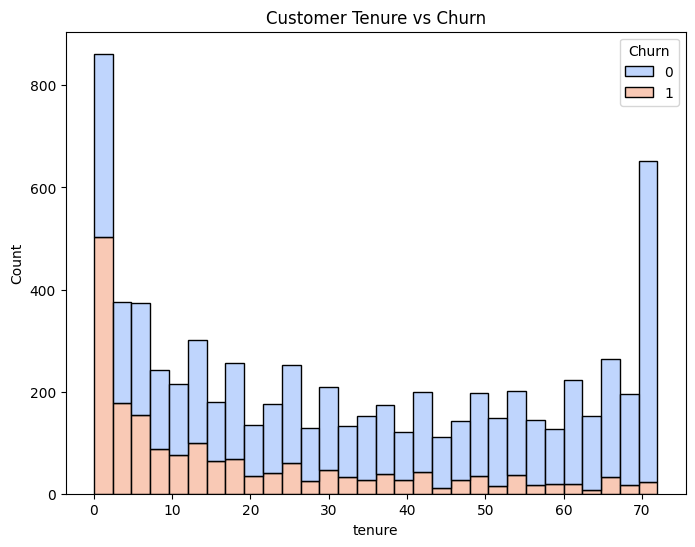

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30, palette="coolwarm")
plt.title("Customer Tenure vs Churn")
plt.show()


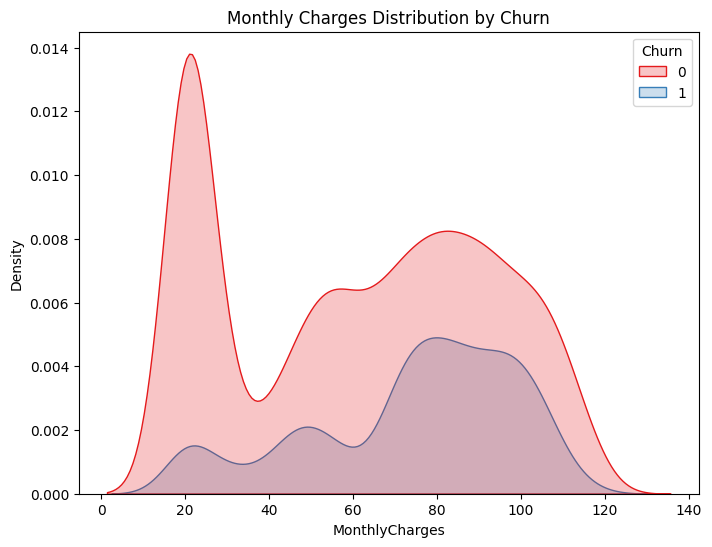

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(x="MonthlyCharges", hue="Churn", data=df, fill=True, palette="Set1")
plt.title("Monthly Charges Distribution by Churn")
plt.show()


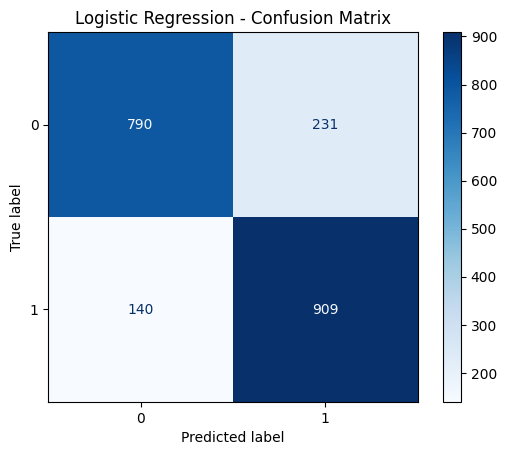

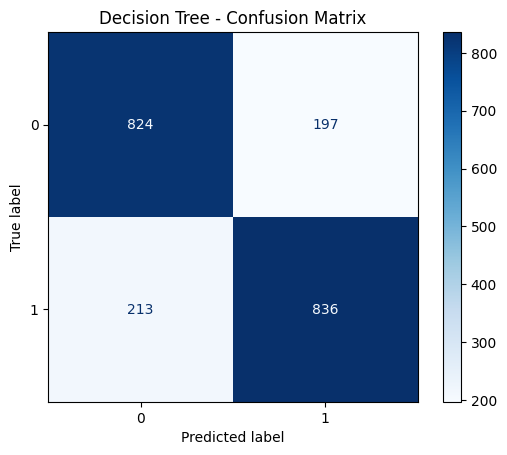

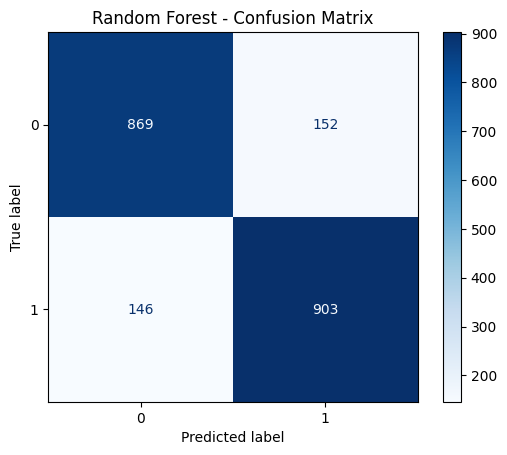

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf
}

for name, model in models.items():
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
    disp.ax_.set_title(f"{name} - Confusion Matrix")
    plt.show()


Logistic Regression Accuracy: 0.8208
Decision Tree Accuracy: 0.8019
Random Forest Accuracy: 0.8560


/tmp/ipython-input-2199961570.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="pastel")


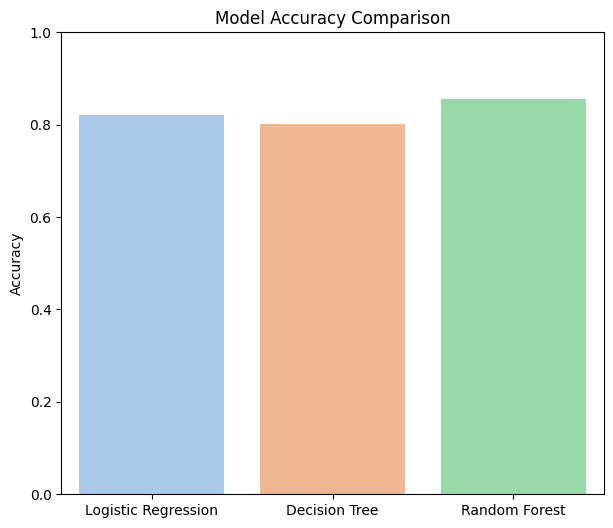

In [20]:
from sklearn.metrics import accuracy_score

# Store accuracy results
accuracy_results = {}

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(7,6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="pastel")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()
